<a href="https://colab.research.google.com/github/jlcamelo2350/Dados-e-automacao/blob/main/C%C3%B3pia_de_Varejo_Br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Obtendo dados financeiros de empresas varejistas brasileiras**

---




Baixar informações do balanço patrimonial e as demonstrações de resultado das empresas Magazine Luiza, Arezzo, Alpagartas, Grupo De Moda Soma, Lojas Renner e Guararapes Confeccoes S.A.

Baixando o balanço patrimonial e salvando em Excel:

In [ ]:
#Importo as bibliotecas que utilizarei

import pandas as pd
import yfinance as yf
import os

In [ ]:
#Crio uma função que baixa os dados do Balanço Patrimonial das empresas

def BP():
    # Lista de tickers das empresas
    tickers = ['MGLU3.SA','SOMA3.SA', 'LREN3.SA', 'ARZZ3', 'GUAR3.SA', 'ALPA4.SA']

    #    Crio uma lista vazia que vou utilizar logo mais
    balance_sheets = []

    # Loop para baixar os balanços patrimoniais de cada empresa
    for ticker in tickers:
        try:
            ativo = yf.Ticker(ticker)
            balanco = ativo.get_balance_sheet(freq='yearly')  ##Baixa os dados do balanço patrimonial dos últimos anos
            balanco['Company'] = ticker.split('.')[0]
            balance_sheets.append(balanco)
        except Exception as e:
            print(f"Erro ao baixar dados para o ativo {ticker}: {e}")

    # Concatenar os balanços patrimoniais em um único dataframe
    balancos = pd.concat(balance_sheets, axis=1)
    balancos.reset_index(inplace=True)

    # Visualizar os primeiros registros do dataframe
    print(balancos.head())

    # Caminho para o diretório de downloads do usuário
    caminho = os.path.join(os.path.expanduser('~'), 'Downloads')
    # Salvar o dataframe em um arquivo Excel
    balancos.to_excel(os.path.join(caminho, 'BP_varejo.xlsx'), index=False)


In [ ]:

# Chamar a função BP para executar o código
BP()

Baixando informações do dre e salvando em arquivo excel:



In [1]:
import yfinance as yf
import pandas as pd
import os

def DRE():
    # Lista de tickers das empresas
    tickers = ['MGLU3.SA','SOMA3.SA', 'LREN3.SA', 'ARZZ3', 'GUAR3.SA', 'ALPA4.SA']

    dfs = []

    # Loop para baixar a Demonstração de Resultados do Exercício de cada empresa
    for ticker in tickers:
        ativo = yf.Ticker(ticker)
        dre = ativo.get_financials(freq='yearly')  ##Baixa os dados da DRE dos últimos anos
        dre['Company'] = ticker.split('.')[0]
        dfs.append(dre)

    # Concatenar as Demonstrações de Resultados do Exercício em um único dataframe
    resultado = pd.concat(dfs, axis=1)
    resultado.reset_index(inplace=True)

    # Caminho para o diretório de downloads do usuário
    caminho = os.path.join(os.path.expanduser('~'), 'Downloads')
    # Salvar o dataframe em um arquivo Excel
    resultado.to_excel(os.path.join(caminho, 'dre anual.xlsx'), index=False)



In [ ]:
#Chamada da função:
DRE()

Um exemplo de como ficou a planilha com os dados das empresas após organizado:
Trecho do Balanço Patrimonial da Magazine Luiza


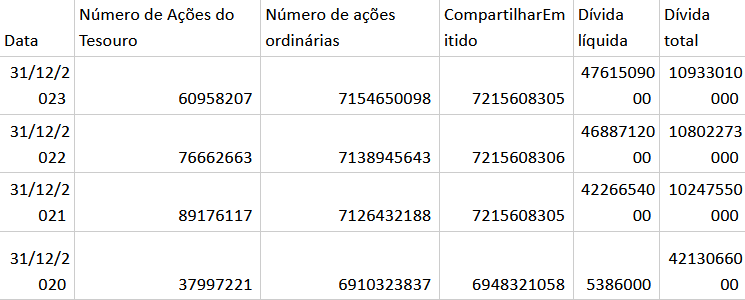

